In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
from matplotlib.lines import Line2D
from plot import plot

ps = np.array(range(1, 10))/10

def edit_dict(d):
    c0 = d['calib-error-0']
    c1 = d['calib-error-1']
    for i, p in enumerate(ps):
        d[f'cal-error-0-p-{p}'] = c0[i]
        d[f'cal-error-1-p-{p}'] = c1[i]
    return d


with open('result.txt', 'r') as f:
    txt = f.read()
    dicts = re.split('\n', txt)[:-1]
    dicts = [eval(d) for d in dicts]
    dicts = [edit_dict(d) for d in dicts]
    df = pd.DataFrame(dicts)

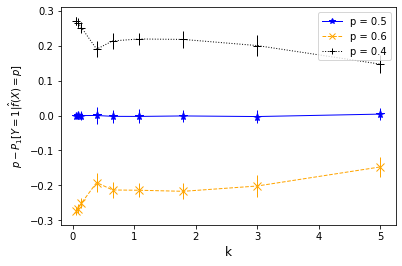

In [2]:
### Parameter list for plot function
"""
df: dataframe, 
xaxis: (default 'k')

The next parameters are fixed at a given level, except xaxis
pi: (default 0.1)
k: (default 0.05)
s: (default 0.5)
theta: (default np.pi/4)

p_choice: choices of p for which calibration errors to be plotted; must be a list; doesn't support more          than 4 values; only valid when measure is 'cal-error-0' or 'cal-error-1' (default [0.2, 0.8])
penalty: (default 'l1') 
measure: the quantity to be plotted; choices {'cal-error-0', 'cal-error-1', 'score', 'theta'}
         - For 'cal-error-0' and 'cal-error-1' plots calibration error for given p_choice
         - For 'score' and 'theta' plots accuracy and angle between estimated and original beta for both the groups
"""



plot(df, p_choice=[0.5, 0.6, 0.4], measure= 'cal-error-1')